In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
house = pd.read_csv("C:/Users/USER/Desktop/datasets/housing.csv")

In [5]:
type(house)

pandas.core.frame.DataFrame

In [7]:
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
indexID = house[house['ocean_proximity']== 'ISLAND'].index
indexID

Int64Index([8314, 8315, 8316, 8317, 8318], dtype='int64')

In [12]:
house.shape

(20640, 10)

In [13]:
house = house.drop(indexID)

In [14]:
house.shape

(20635, 10)

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20428 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


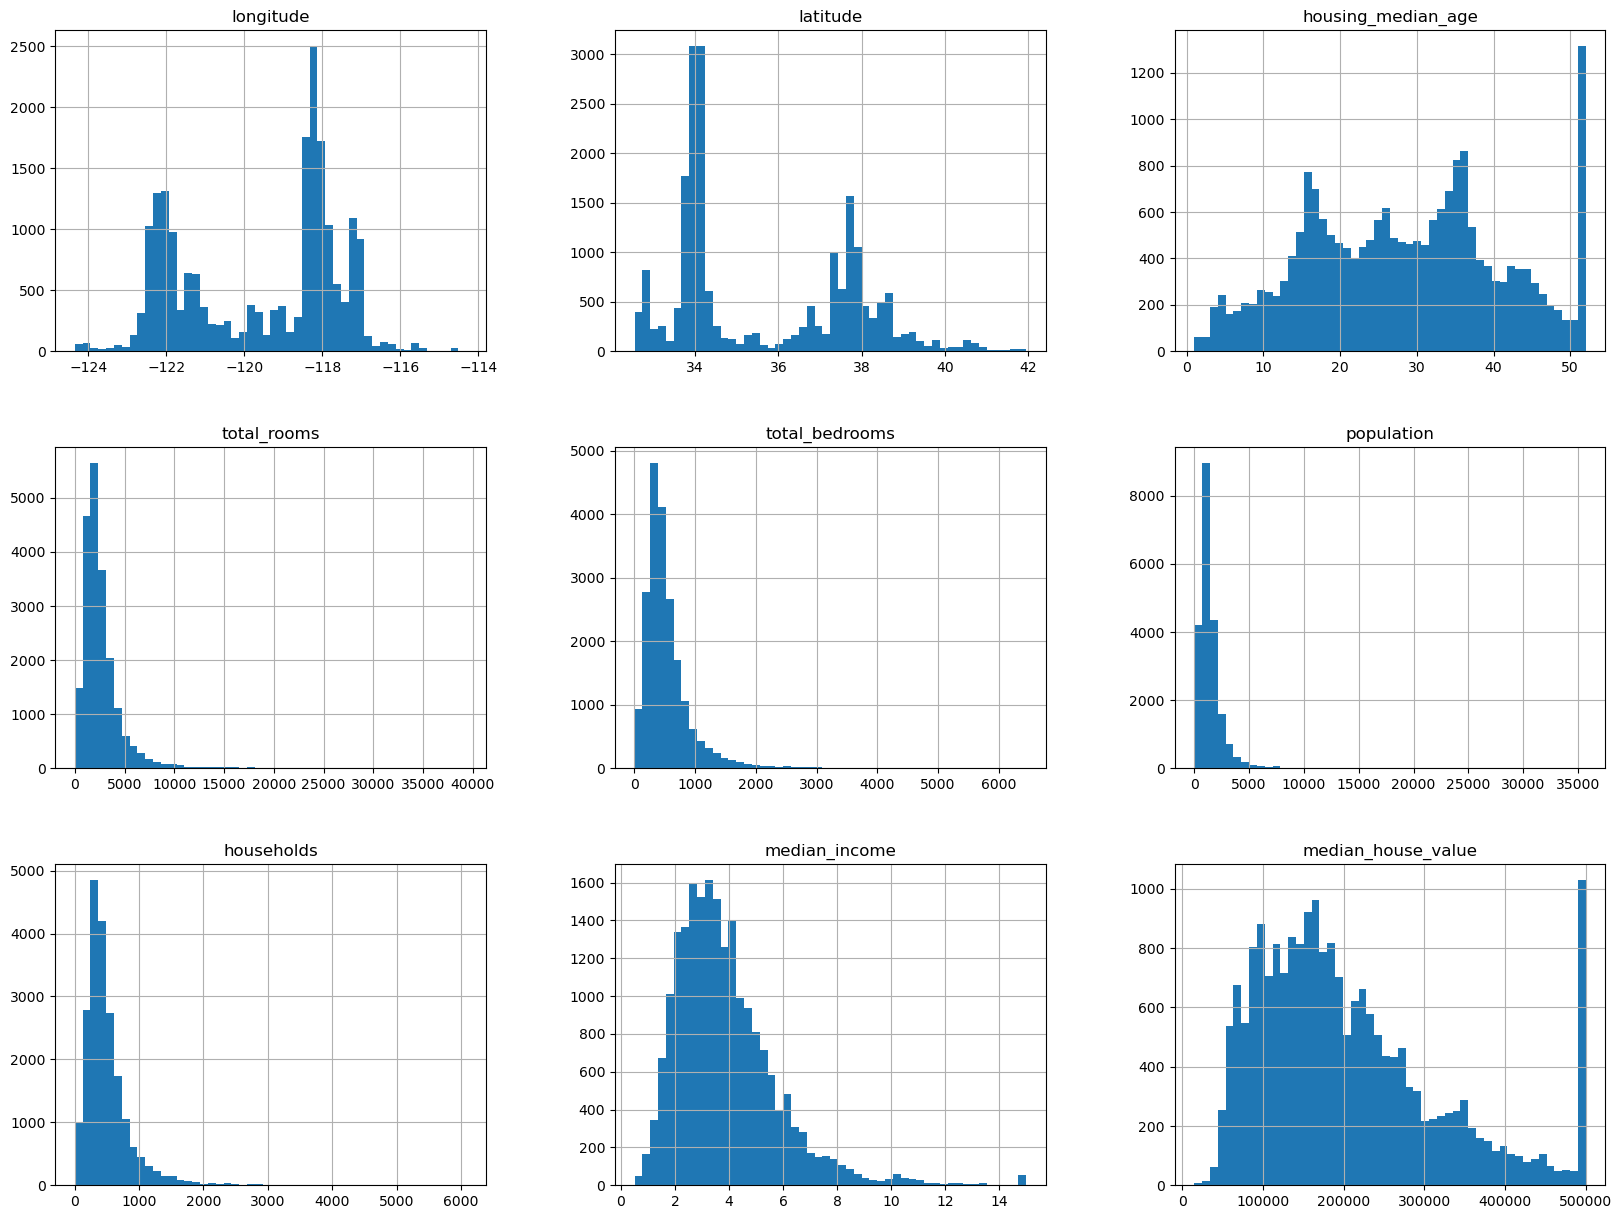

In [17]:
house.hist(bins=50,figsize=(20,15))
plt.show()

In [18]:
house_data = house.drop('median_house_value',axis=1)
house_label = house['median_house_value'].copy()

In [19]:
print(house_data.shape)
print(house_label.shape)

(20635, 9)
(20635,)


In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(house_data,house_label,test_size = 0.2)


In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16508, 9)
(4127, 9)
(16508,)
(4127,)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

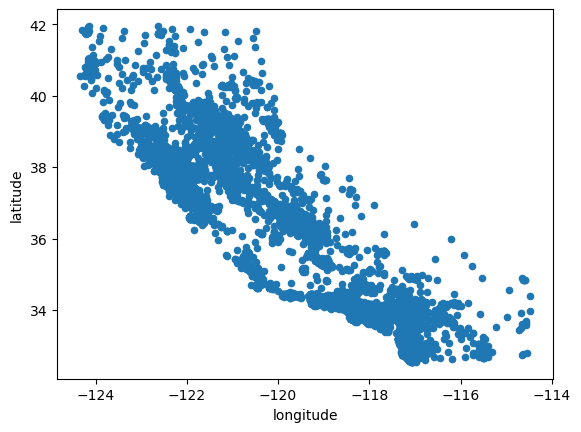

In [23]:
x_train.plot(kind='scatter',x = 'longitude',y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

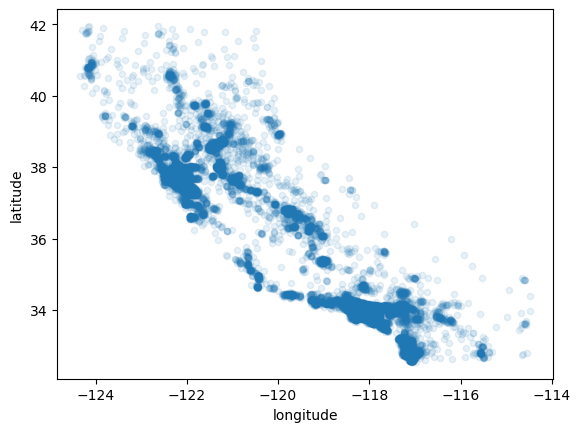

In [24]:
x_train.plot(kind='scatter',x = 'longitude',y = 'latitude',alpha=0.1)

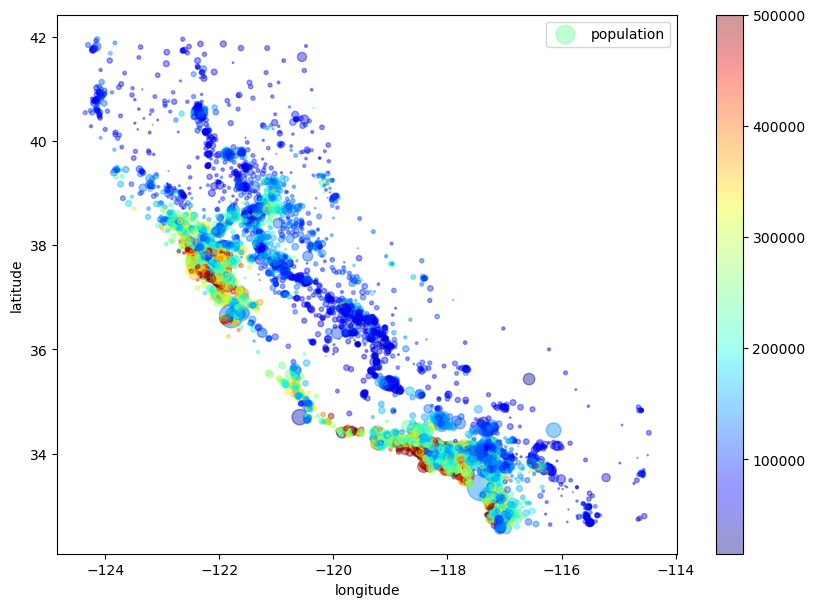

In [28]:
x_train.plot(kind='scatter',x = 'longitude',y = 'latitude',alpha=0.4,
             s=x_train['population']/100,label = 'population',figsize = (10,7),
            c=y_train,cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

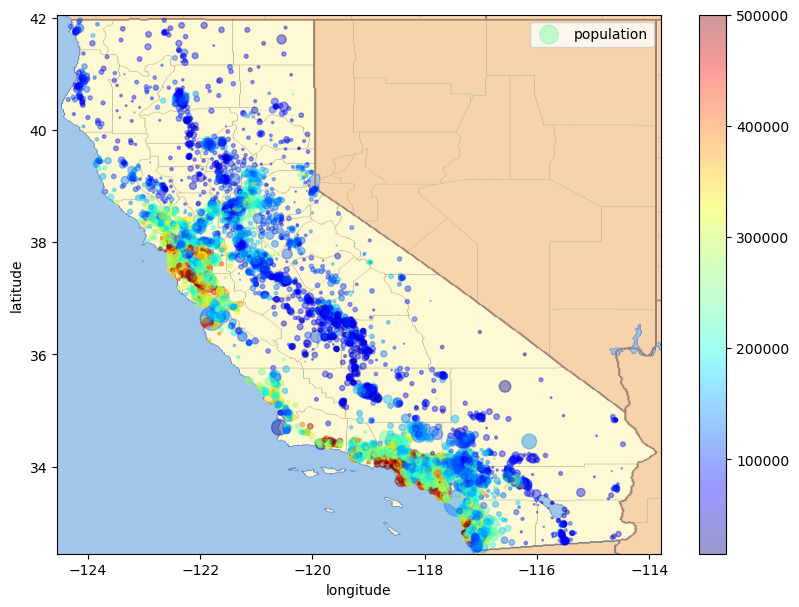

In [29]:
import matplotlib.image as mpimg
img = mpimg.imread("C:/Users/USER/Desktop/datasets/california.png")

x_train.plot(kind='scatter',x = 'longitude',y = 'latitude',alpha=0.4,
             s=x_train['population']/100,label = 'population',figsize = (10,7),
            c=y_train,cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

plt.imshow(img,extent = [-124.55,-113.80,32.45,42.05])

In [31]:
sample_missingvalue = x_train[x_train.isnull().any(axis=1)]

In [32]:
sample_missingvalue.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,INLAND
16025,-122.44,37.73,39.0,1912.0,NaN,970.0,406.0,4.7813,NEAR BAY
7228,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,<1H OCEAN
2351,-119.68,36.79,16.0,1551.0,NaN,1010.0,292.0,3.5417,INLAND


In [33]:
sample_missingvalue.shape

(161, 9)

In [34]:
sample_missingvalue.dropna(subset = ['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
sample_missingvalue.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,530.0,186.0,3.0917,INLAND
16025,-122.44,37.73,39.0,1912.0,970.0,406.0,4.7813,NEAR BAY
7228,-118.16,34.01,40.0,1552.0,1919.0,427.0,2.2596,<1H OCEAN
2351,-119.68,36.79,16.0,1551.0,1010.0,292.0,3.5417,INLAND
...,...,...,...,...,...,...,...,...
5236,-118.23,33.94,36.0,1110.0,1417.0,302.0,2.3333,<1H OCEAN
12570,-121.44,38.54,39.0,2855.0,1217.0,562.0,3.2404,INLAND
3354,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
8915,-118.46,34.03,52.0,523.0,317.0,130.0,2.2794,<1H OCEAN


In [37]:
med = x_train['total_bedrooms'].median()
med

437.0

In [38]:
sample_missingvalue['total_bedrooms'].fillna(med,inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_3548\2327142100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_missingvalue['total_bedrooms'].fillna(med,inplace = True)


In [39]:
sample_missingvalue.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16885,-122.40,37.58,26.0,3281.0,437.0,1145.0,480.0,6.3580,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,437.0,530.0,186.0,3.0917,INLAND
16025,-122.44,37.73,39.0,1912.0,437.0,970.0,406.0,4.7813,NEAR BAY
7228,-118.16,34.01,40.0,1552.0,437.0,1919.0,427.0,2.2596,<1H OCEAN
2351,-119.68,36.79,16.0,1551.0,437.0,1010.0,292.0,3.5417,INLAND


In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

x_train_num = x_train.drop('ocean_proximity',axis=1)

In [43]:
x_train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1687,-122.27,37.99,16.0,4921.0,737.0,2312.0,725.0,5.8899
18187,-122.02,37.38,43.0,1261.0,317.0,836.0,333.0,4.0911
2471,-119.81,36.60,24.0,2246.0,462.0,1291.0,394.0,2.4006
426,-122.27,37.88,52.0,1693.0,391.0,669.0,367.0,3.5417
19054,-121.69,38.16,46.0,2292.0,472.0,970.0,431.0,2.2888


In [44]:
imputer.fit(x_train_num)

SimpleImputer(strategy='median')

In [45]:
X = imputer.transform(x_train_num)

In [46]:
type(X)

numpy.ndarray

In [48]:
x_train_tr = pd.DataFrame(X,columns=x_train_num.columns,index=x_train_num.index)

In [49]:
type(x_train_tr)

pandas.core.frame.DataFrame

In [50]:
x_train_tr.loc[sample_missingvalue.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16885,-122.40,37.58,26.0,3281.0,437.0,1145.0,480.0,6.3580
11741,-121.13,38.87,48.0,1127.0,437.0,530.0,186.0,3.0917
16025,-122.44,37.73,39.0,1912.0,437.0,970.0,406.0,4.7813
7228,-118.16,34.01,40.0,1552.0,437.0,1919.0,427.0,2.2596
2351,-119.68,36.79,16.0,1551.0,437.0,1010.0,292.0,3.5417
...,...,...,...,...,...,...,...,...
5236,-118.23,33.94,36.0,1110.0,437.0,1417.0,302.0,2.3333
12570,-121.44,38.54,39.0,2855.0,437.0,1217.0,562.0,3.2404
3354,-120.67,40.50,15.0,5343.0,437.0,2503.0,902.0,3.5962
8915,-118.46,34.03,52.0,523.0,437.0,317.0,130.0,2.2794


In [52]:
x_train_cat = x_train[['ocean_proximity']]

In [54]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse = False)

x_train_cat_1hot = cat_encoder.fit_transform(x_train_cat)

In [55]:
type(x_train_cat_1hot)

numpy.ndarray

In [56]:
x_train_cat_1hot[0:5]

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [57]:
x_train_cat[0:5]

,ocean_proximity
1687,NEAR BAY
18187,<1H OCEAN
2471,INLAND
426,NEAR BAY
19054,INLAND


In [78]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16508.000000,16508.000000,16508.000000,16508.000000,16347.000000,16508.000000,16508.000000,16508.000000
mean,-119.579125,35.640666,28.654531,2657.617095,540.829816,1434.081294,502.468440,3.875445
std,2.003885,2.135157,12.599085,2220.969234,425.844183,1154.665049,386.987046,1.903330
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.940000,18.000000,1456.750000,298.000000,790.000000,281.000000,2.562500
50%,-118.510000,34.260000,29.000000,2131.500000,437.000000,1170.000000,411.000000,3.534950
75%,-118.010000,37.720000,37.000000,3165.000000,649.500000,1737.000000,606.000000,4.750000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy ='median')),
    ('std_scaler',StandardScaler())
])

In [67]:
from sklearn.compose import ColumnTransformer

num_feats = list(x_train_num)
cat_feats = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_feats),
    ('cat',OneHotEncoder(),cat_feats)
])

In [73]:
x_train_transformed = full_pipeline.fit_transform(x_train)

In [74]:
x_test_transformed = full_pipeline.fit_transform(x_test)

In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(x_test_transformed)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

In [77]:
print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)


MSE:  4692950398.315215
RMSE:  68505.11220569757
MAE:  49995.92470946447
